Baseline model accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      0.17      0.29        12
         2.0       0.00      0.00      0.00         1
         3.0       0.90      1.00      0.95       232
         4.0       0.00      0.00      0.00         8

    accuracy                           0.90       260
   macro avg       0.38      0.23      0.25       260
weighted avg       0.85      0.90      0.86       260

Logistic Regression accuracy: 0.9


C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree accuracy: 0.8576923076923076
Gradient Boosting accuracy: 0.8846153846153846
Random Forest accuracy: 0.9076923076923077


C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best hyperparameters: {'C': 100, 'solver': 'saga'}


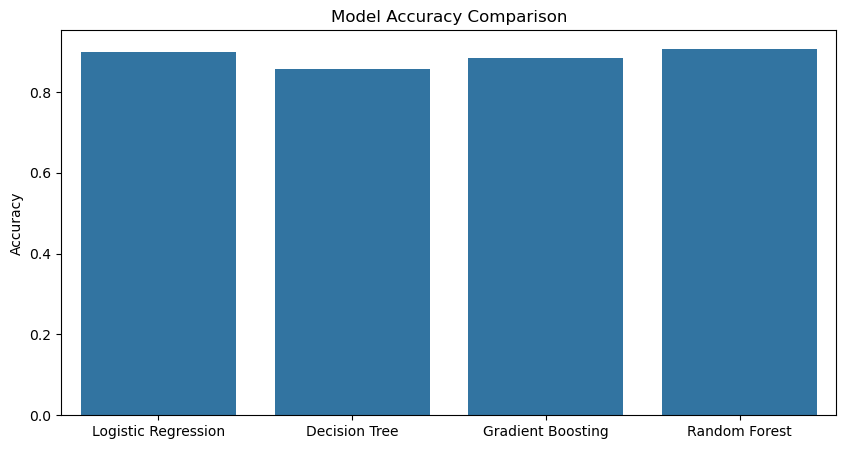

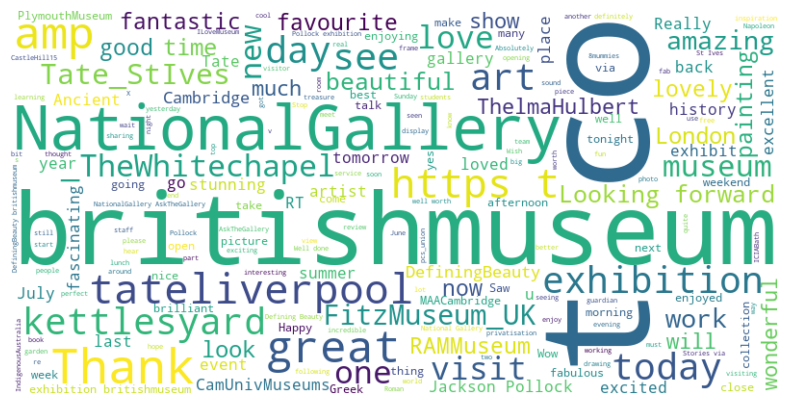

Improved model accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      0.17      0.29        12
         2.0       0.00      0.00      0.00         1
         3.0       0.90      1.00      0.95       232
         4.0       0.00      0.00      0.00         8

    accuracy                           0.90       260
   macro avg       0.38      0.23      0.25       260
weighted avg       0.85      0.90      0.86       260



C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# Data preprocessing
X = data['text']
y = data['emotions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 3. Build baseline model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

print("Baseline model accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. Compare different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc
    print(f"{model_name} accuracy: {acc}")

# 5. Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# 6. Visualize data
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 7. Explore improvement methods: using TF-IDF vectorization
improved_model = LogisticRegression()
improved_model.fit(X_train_vectorized, y_train)
y_pred_improved = improved_model.predict(X_test_vectorized)
print("Improved model accuracy:", accuracy_score(y_test, y_pred_improved))
print(classification_report(y_test, y_pred_improved))